# Face detection using OpenCV with Viola-Jones algorithm

In this notebook we can see an OpenCV example to detect faces using Viola-Jones. First, you need to download the Haar model called "haarcascade_frontalface_default.xml" from [this link](https://github.com/opencv/opencv/tree/master/data/haarcascades), and also [this sample image](https://www.snexplores.org/wp-content/uploads/2019/11/860_main_beauty.png)

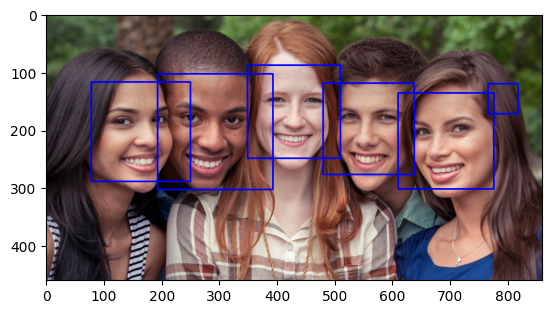

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the model
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read an image
img = cv.imread('860_main_beauty.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Run face detector
faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    # Draw faces
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

# Show image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

As you can see, it's very easy to use a Viola-Jones detector with OpenCV. However, starting from OpenCV 4.0 version, it is not possible to train a Haar cascade classifier anymore, so we can't experiment with training or fine-tuning using this library.

Please, answer the following questions:

- May an integral image value $ii(x,y)$ be smaller than $ii(x-1, y-1)$?

no. Esto se debe a la forma en que se calcula la imagen integral:

Cada punto en una imagen integral incluye todos los valores de píxeles a su izquierda y por encima. Por lo tanto, el valor en ii(x, y) incluye el área cubierta por ii(x-1, y-1) y más.

Dado que los valores de los píxeles son generalmente no negativos (especialmente en imágenes en escala de grises y de color), agregar más píxeles a la suma no puede disminuir el valor de la suma.

Por lo tanto, bajo condiciones normales, siempre se espera que:

ii(x, y) >= ii(x-1, y-1)

- In the classifiers cascade structure, what is the impact of a false negative yielded by a middle classifier?

En una estructura de cascada de clasificadores, si un clasificador intermedio produce un falso negativo, el objeto en cuestión es inmediatamente descartado y no pasa a través de los clasificadores subsecuentes. Esto significa que un falso negativo en cualquier punto de la cascada resulta en la no detección del objeto de interés, aunque los clasificadores posteriores pudieran haberlo clasificado correctamente.

- Why should the classifiers in AdaBoost be very simple (weak)?

La razón principal por la que AdaBoost utiliza clasificadores débiles, que son muy simples, es para prevenir el sobreajuste y asegurar una mejor generalización. Los clasificadores simples tienen menos riesgo de ajustarse excesivamente a los datos de entrenamiento, lo que permite que AdaBoost, al combinar muchos de estos clasificadores simples, capture las características esenciales de los datos sin perder la capacidad de funcionar bien en datos no vistos. Además, los clasificadores simples son computacionalmente eficientes de entrenar, lo cual es importante dado que AdaBoost construye su modelo final a través de un proceso iterativo.

- Discuss how the Viola-Jones method is optimized for real-time processing. What are the key factors that allow it to run efficiently in real-time?

Imágenes Integrales: Utiliza imágenes integrales para calcular rápidamente las características tipo Haar. Las imágenes integrales permiten sumar los valores de los píxeles en cualquier área rectangular de la imagen en tiempo constante, independientemente de su tamaño.

Cascada de Clasificadores: Emplea una cascada de clasificadores débiles y simples. Esto significa que la mayoría de las regiones no faciales son descartadas rápidamente en las primeras etapas de la cascada, reduciendo significativamente la cantidad de cálculos necesarios para las regiones restantes.